# Importar librerias

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Generación de datos de ejemplo

In [2]:
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', end='2024-08-14')
values = np.arange(len(dates))*.2 + np.random.rand(len(dates))*50
ts=pd.Series(values, index=dates)
ts.head()

,0
2023-01-01,27.440675
2023-01-02,35.959468
2023-01-03,30.538169
2023-01-04,27.844159
2023-01-05,21.982740


# Gráfica de la serie original

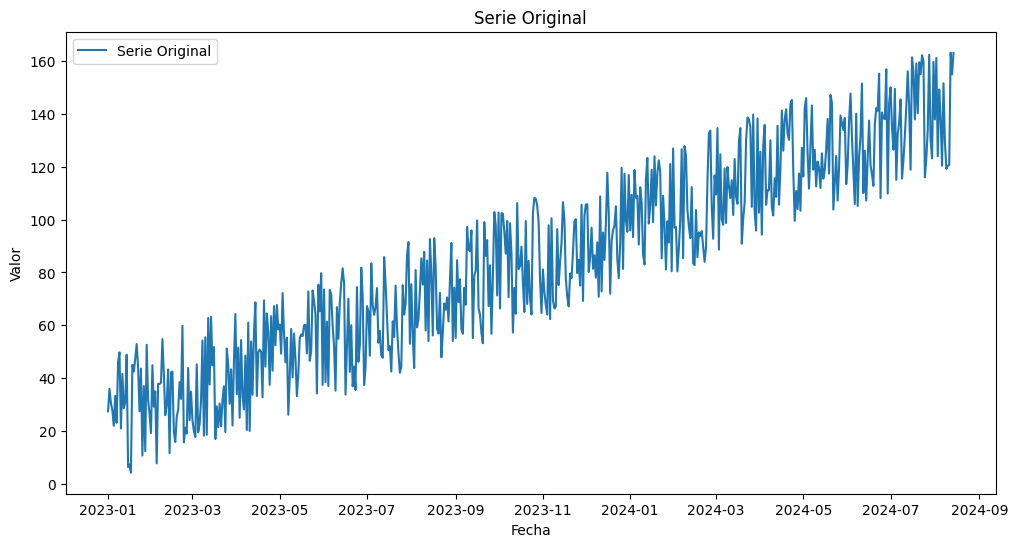

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Serie Original')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Original')
plt.legend()
plt.show()

# Descomposición de la serie de tiempo

In [4]:
descomposition = seasonal_decompose(ts, model='additive')

# Gráfica de la descomposición

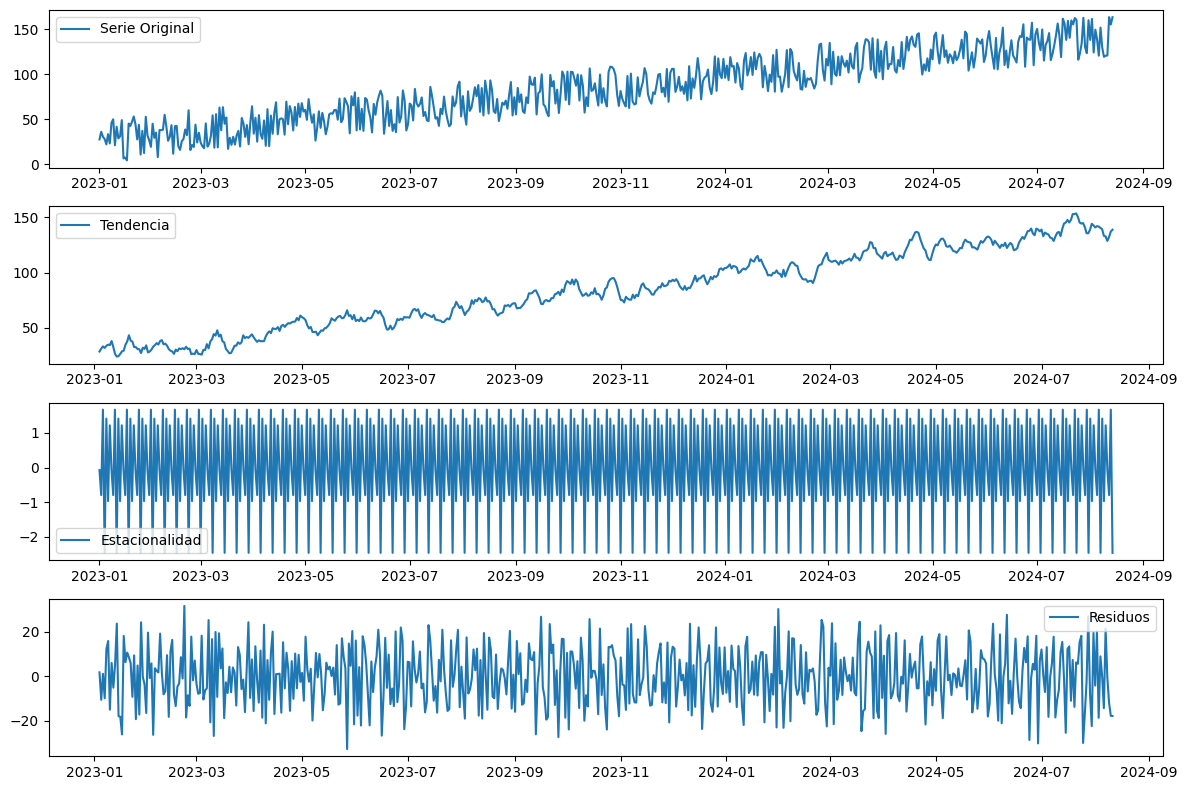

In [5]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ts, label='Serie Original')
plt.legend()

plt.subplot(412)
plt.plot(descomposition.trend, label='Tendencia')
plt.legend()

plt.subplot(413)
plt.plot(descomposition.seasonal, label='Estacionalidad')
plt.legend()

plt.subplot(414)
plt.plot(descomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# Parte 2

# Importar datos

In [1]:
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 22.8MB/s]


In [2]:
!unzip daily-climate-time-series-data.zip

Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [18]:
import pandas as pd
df_train = pd.read_csv('DailyDelhiClimateTrain.csv')
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [29]:
df_test = pd.read_csv('DailyDelhiClimateTest.csv')
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


# Datos de entrenamiento

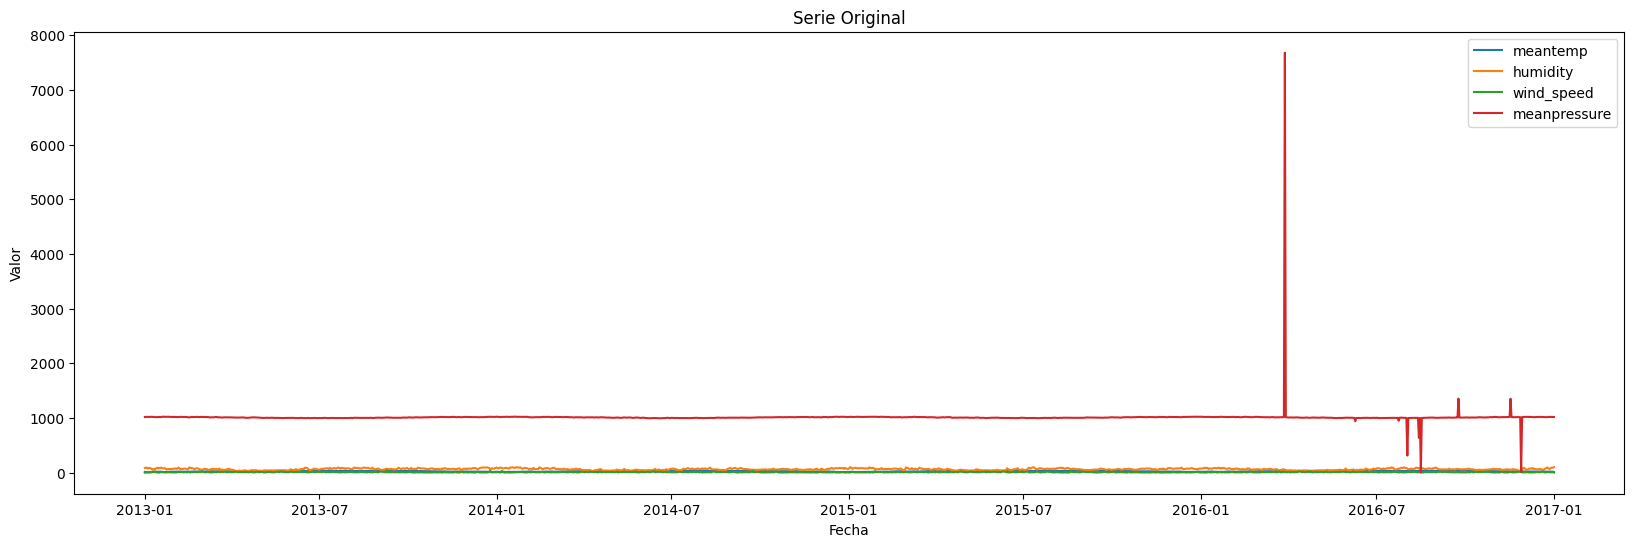

In [22]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_train.set_index('date', inplace=True)
df_test.set_index('date', inplace=True)
plt.figure(figsize=(20, 6))
plt.plot(df_train, label=df_train.columns)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Original')
plt.legend()
plt.show()

In [24]:
descomposition = seasonal_decompose(df_train[['meantemp']], model='additive')

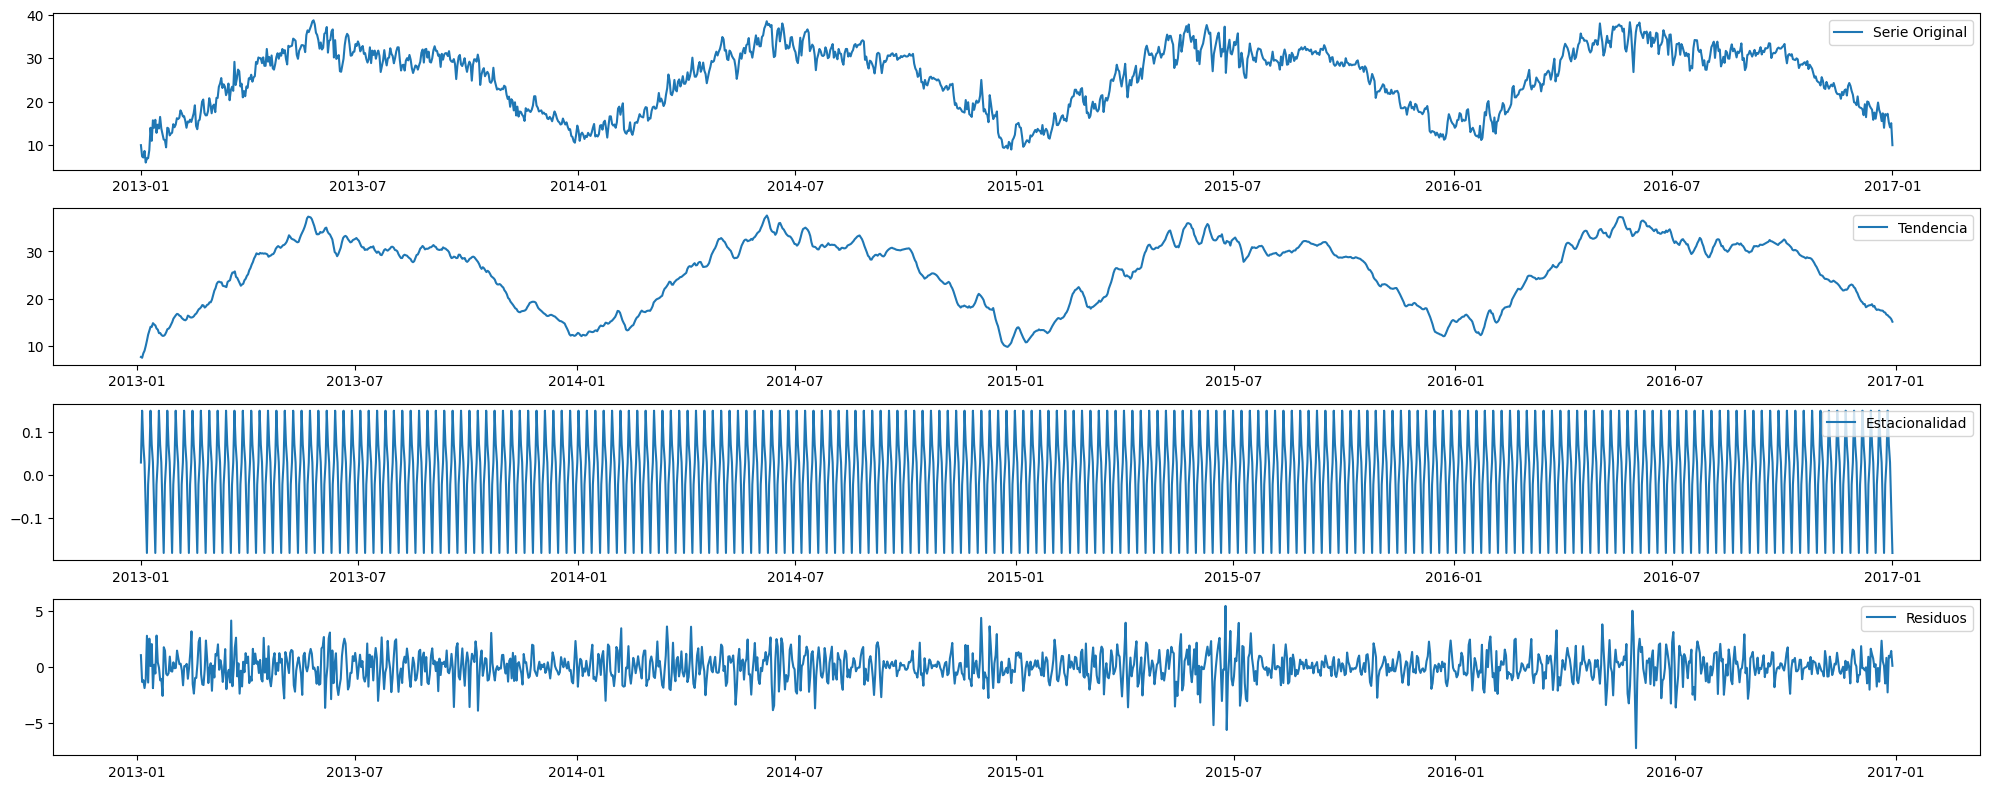

In [27]:
plt.figure(figsize=(20, 8))
plt.subplot(411)
plt.plot(df_train[['meantemp']], label='Serie Original')
plt.legend()

plt.subplot(412)
plt.plot(descomposition.trend, label='Tendencia')
plt.legend()

plt.subplot(413)
plt.plot(descomposition.seasonal, label='Estacionalidad')
plt.legend()

plt.subplot(414)
plt.plot(descomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# Datos de test

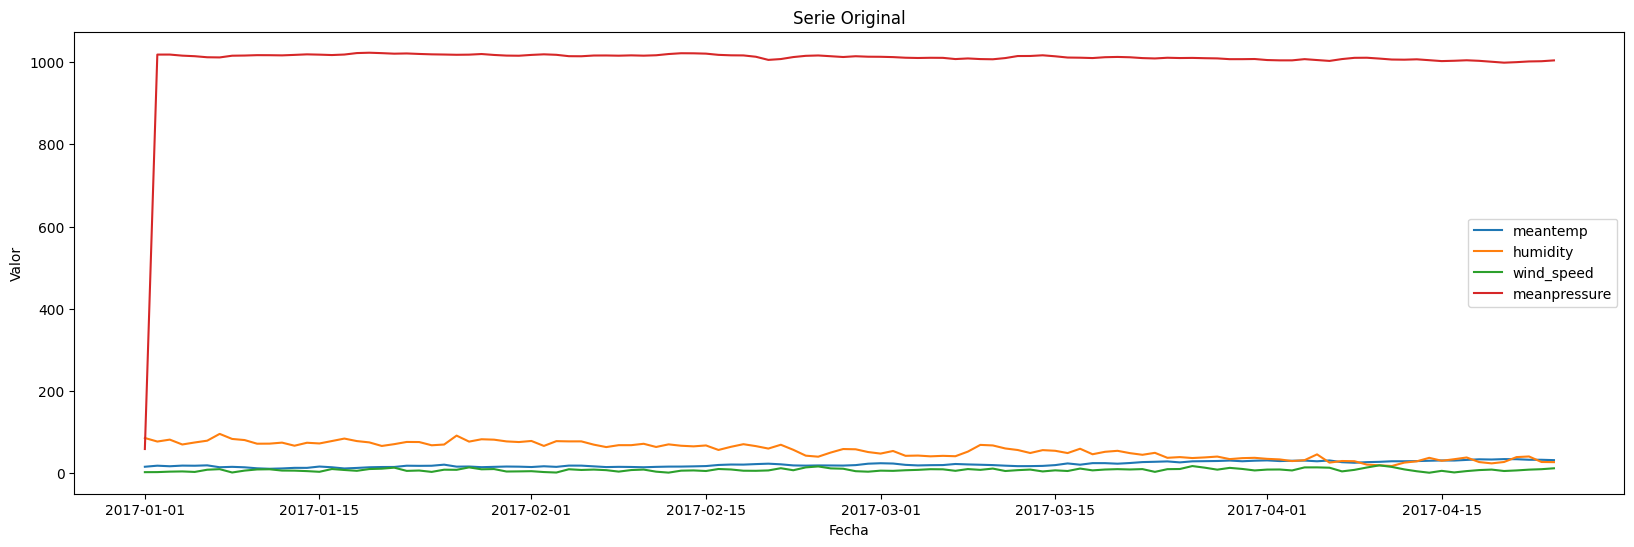

In [32]:

plt.figure(figsize=(20, 6))
plt.plot(df_test, label=df_test.columns)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Original')
plt.legend()
plt.show()

In [33]:
descomposition = seasonal_decompose(df_test[['meantemp']], model='additive')

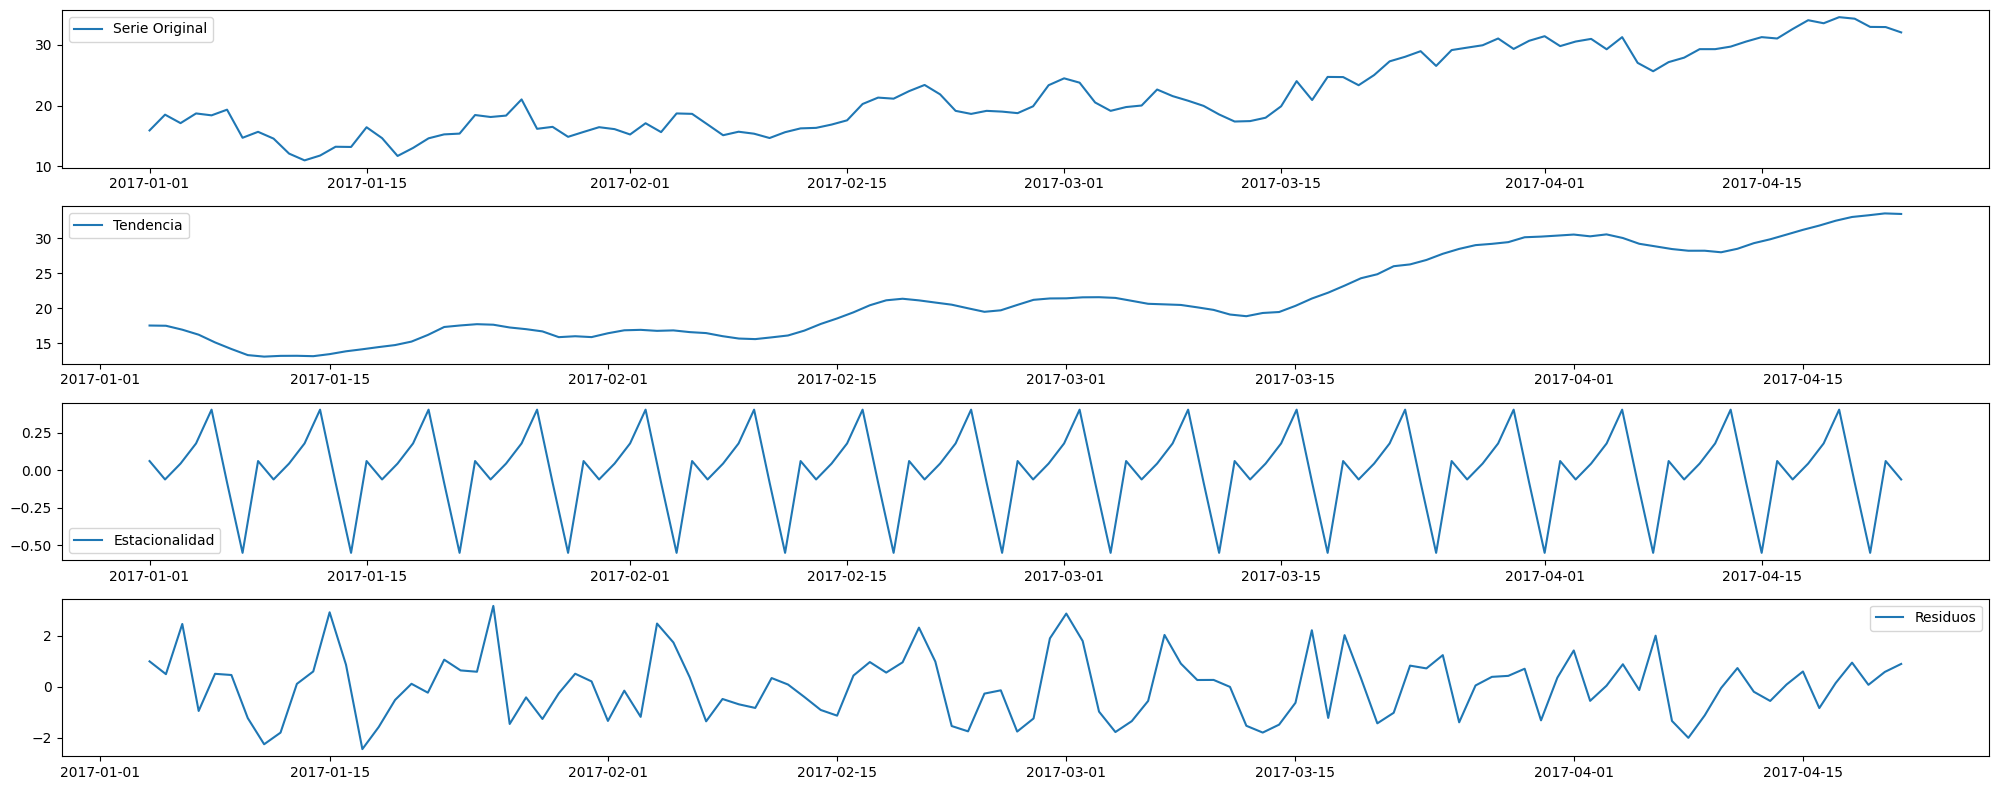

In [34]:
plt.figure(figsize=(20, 8))
plt.subplot(411)
plt.plot(df_test[['meantemp']], label='Serie Original')
plt.legend()

plt.subplot(412)
plt.plot(descomposition.trend, label='Tendencia')
plt.legend()

plt.subplot(413)
plt.plot(descomposition.seasonal, label='Estacionalidad')
plt.legend()

plt.subplot(414)
plt.plot(descomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()